In [2]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [3]:
house_price=pd.read_csv('Quarterly_House_Price.csv')
consumer_confidence=pd.read_csv('Quarterly Consumer Confidence Index.csv')
construction_cost=pd.read_csv('Quarterly_Construction_Cost.csv')
gdp=pd.read_csv('Quarterly_GDPpc.csv')
hpi=pd.read_csv('Quarterly_HPI.csv')
index=pd.read_csv('Quarterly_Index.csv')
policy_uncert=pd.read_csv('Quarterly_Policy_Uncertainity.csv')
labor_momenteum=pd.read_csv('Quarterly_Labor_Movement_Info.csv')
rent_price=pd.read_csv('Quarterly_Rent.csv')

In [4]:
rent_price=rent_price.rename(columns={'United States':'United States-R'})
rent_price

,Quarterly,United States-R,"New York, NY","Los Angeles-Long Beach-Anaheim, CA","Chicago, IL","Dallas-Fort Worth, TX","Philadelphia, PA","Houston, TX","Washington, DC","Miami-Fort Lauderdale, FL",...,"Scranton, PA","Harrisburg, PA","Melbourne, FL","Spokane, WA","Provo, UT","Durham, NC","Port St. Lucie, FL","Fort Collins, CO","Boulder, CO","Gainesville, GA"
0,2014Q1,1334.666667,2304.333333,1712.333333,1422.000000,1189.000000,1304.000000,1180.333333,1806.000000,1594.000000,...,778.000000,940.333333,960.000000,960.666667,997.000000,1099.333333,1072.000000,1213.000000,1500.333333,932.333333
1,2014Q2,1351.333333,2335.000000,1743.000000,1433.333333,1200.000000,1312.000000,1200.333333,1815.000000,1618.000000,...,782.000000,934.000000,974.000000,948.333333,1010.000000,1111.000000,1096.333333,1233.000000,1523.000000,940.000000
2,2014Q3,1367.666667,2365.333333,1774.000000,1444.333333,1212.000000,1320.000000,1219.666667,1823.666667,1641.333333,...,786.000000,929.333333,989.333333,938.000000,1022.666667,1123.000000,1120.000000,1253.000000,1546.000000,948.000000
3,2014Q4,1384.333333,2395.666667,1804.666667,1454.666667,1224.000000,1328.000000,1238.000000,1831.333333,1665.000000,...,788.666667,927.000000,1005.333333,931.666667,1035.000000,1134.000000,1141.666667,1275.000000,1572.333333,958.000000
4,2015Q1,1400.333333,2424.333333,1835.000000,1465.333333,1237.000000,1337.333333,1252.333333,1838.000000,1689.000000,...,789.000000,931.000000,1024.000000,937.000000,1047.000000,1143.000000,1160.000000,1298.333333,1603.333333,972.000000
5,2015Q2,1416.333333,2451.333333,1865.000000,1476.333333,1251.666667,1346.000000,1262.000000,1844.333333,1713.000000,...,789.666667,938.000000,1045.000000,948.333333,1059.000000,1152.333333,1178.666667,1319.333333,1636.333333,990.000000
6,2015Q3,1432.000000,2476.000000,1895.666667,1488.666667,1266.000000,1356.333333,1270.666667,1852.666667,1737.333333,...,792.333333,943.000000,1067.000000,959.333333,1072.333333,1163.000000,1200.333333,1335.333333,1669.000000,1006.333333
7,2015Q4,1448.000000,2496.333333,1927.333333,1503.000000,1281.000000,1367.000000,1277.000000,1862.000000,1759.666667,...,797.000000,947.000000,1088.000000,970.000000,1086.000000,1175.000000,1226.000000,1348.333333,1697.333333,1019.000000
8,2016Q1,1462.000000,2511.666667,1958.000000,1516.000000,1296.666667,1377.000000,1280.000000,1870.333333,1777.666667,...,801.666667,953.333333,1108.333333,981.666667,1101.666667,1187.000000,1251.666667,1360.333333,1718.000000,1031.000000
9,2016Q2,1475.000000,2524.333333,1987.000000,1526.333333,1313.333333,1386.000000,1279.666667,1877.333333,1790.666667,...,806.666667,960.333333,1129.000000,995.666667,1117.333333,1199.666667,1273.666667,1370.000000,1730.666667,1045.000000


In [5]:
first_adjust=house_price.merge(consumer_confidence,on='Quarterly')
second_adjust=first_adjust.merge(gdp,on='Quarterly')
third_adjust=second_adjust.merge(hpi,on='Quarterly')
fourth_adjust=third_adjust.merge(labor_momenteum,on='Quarterly')
fifth_adjust=fourth_adjust.merge(policy_uncert,on='Quarterly')
six_adjust=fifth_adjust.merge(index,on='Quarterly')
seven_adjust=six_adjust.merge(rent_price,on='Quarterly')
print(six_adjust.columns)
first_regression=seven_adjust[['United States','United States-R','Index.1','GDP Per Capita','CSUSHPINSA','News_Based_Policy_Uncert_Index','FedStateLocal_Ex_disagreement','CPI_disagreement','Tax_expiration','Index.1','Dividend Yield','Level of activity','Momentum']]
x=first_regression.drop(labels='United States',axis=1)
x=sm.add_constant(x)
y=first_regression['United States']

Index(['Quarterly', 'United States', 'New York, NY',
       'Los Angeles-Long Beach-Anaheim, CA', 'Chicago, IL',
       'Dallas-Fort Worth, TX', 'Philadelphia, PA', 'Houston, TX',
       'Washington, DC', 'Miami-Fort Lauderdale, FL',
       ...
       'Month', 'News_Based_Policy_Uncert_Index',
       'FedStateLocal_Ex_disagreement', 'CPI_disagreement', 'Tax_expiration',
       'Total Return', 'Price Return', 'Index.1', 'Income Return',
       'Dividend Yield'],
      dtype='object', length=927)


In [6]:
x=first_regression.drop(labels='United States',axis=1)
x=sm.add_constant(x)
y=first_regression['United States']
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:          United States   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     1357.
Date:                Sun, 20 Mar 2022   Prob (F-statistic):           4.51e-25
Time:                        02:51:18   Log-Likelihood:                -260.86
No. Observations:                  31   AIC:                             545.7
Df Residuals:                      19   BIC:                             562.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

With the high multicollinearity problem, I thought it would be a good idea to explore random forest regression.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor 


In [8]:
x1=first_regression.drop(labels='United States',axis=1)
y1=first_regression['United States']

In [9]:
model = RandomForestRegressor(n_estimators = 1000, random_state = 0)
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.8, random_state = 28)
model.fit(x_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=0)

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.8, random_state = 28)


In [11]:
y_pred = model.predict(x_test)
rmse = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print(rmse)


25822.898


In [12]:
x_train.columns
column=['Real Estate Income Trust Index Values','GDP Per Capita','Case-Shiller Housing Price Index','News_Based_Policy_Uncert_Index','FedStateLocal_Ex_disagreement','CPI_disagreement','Tax_expiration','Index.1','Dividend Yield','Level of activity','Momentum','Rent Price']

[0.09719584 0.10632124 0.0369569  0.09638744 0.10497246 0.05939833
 0.03123501 0.06180903 0.10186445 0.03874952 0.04954204 0.21556776]


<function matplotlib.pyplot.show(close=None, block=None)>

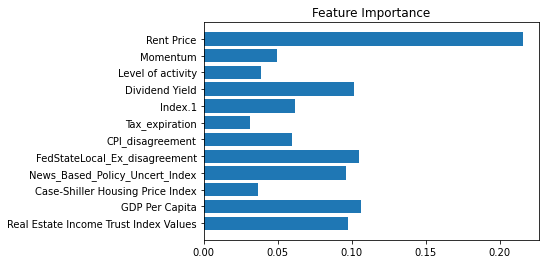

In [13]:
feature_list=model.feature_importances_
print(feature_list)
plt.barh(column,feature_list)
plt.title('Feature Importance')
plt.show


In [32]:

from sklearn.tree import export_graphviz
import pydot
trees = model.estimators_[10]
export_graphviz(trees, out_file = 'tree.dot',feature_names=column,rounded = True, precision = 1)

Decisions paths for the data , so the viewer has a more in-depth concept of something that might seem more black-box to feel more reader friendly, Enthrophy

[Text(0.5, 0.8333333333333334, 'X[11] <= 0.355\nsquared_error = 736624489.802\nsamples = 4\nvalue = 211198.778'),
 Text(0.25, 0.5, 'X[9] <= 4.273\nsquared_error = 17294508.444\nsamples = 2\nvalue = 249070.333'),
 Text(0.125, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 244911.667'),
 Text(0.375, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 253229.0'),
 Text(0.75, 0.5, 'X[10] <= -0.54\nsquared_error = 20598440.333\nsamples = 2\nvalue = 192263.0'),
 Text(0.625, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 184402.0'),
 Text(0.875, 0.16666666666666666, 'squared_error = -0.0\nsamples = 1\nvalue = 194883.333')]

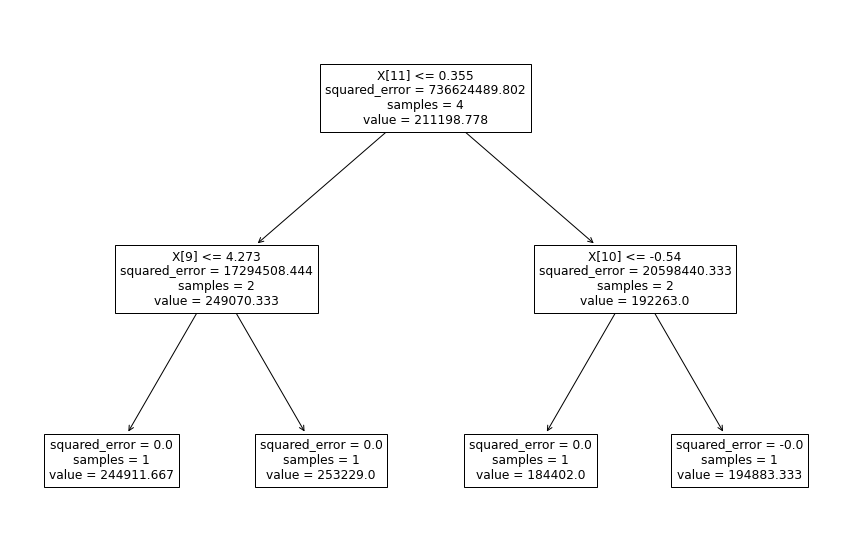

In [33]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(trees)
